In [13]:

# Jupyterでmatplotlibを使用する宣言と、使用するライブラリの定義
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:

# 動画の描画関数の宣言
# 参考URL http://nbviewer.jupyter.org/github/patrickmineault
# /xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
from matplotlib import animation
from IPython.display import display
from IPython.display import HTML
 
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
 
    def animate(i):
        patch.set_data(frames[i])
 
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)
 
    anim.save('movie_cartpole.mp4')  # 追記：動画の保存です
    #display(display_animation(anim, default_mode='loop'))
    HTML(anim.to_html5_video())
    return anim

In [15]:

# CartPoleをランダムに動かす
frames = []
env = gym.make('CartPole-v1', render_mode="rgb_array")
env.reset()
for step in range(0, 200):
    frames.append(env.render())  # framesに各時刻の画像を追加していく
    env.render()
    action = np.random.choice(2)  # 0(カートを左に押す),1(カートを右に押す)をランダムに返す
    observation, reward, terminated, trancated, info = env.step(action)  # actionを実行する
    if terminated: env.reset()

c:\Users\ikemix\anaconda3\envs\rl_env\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


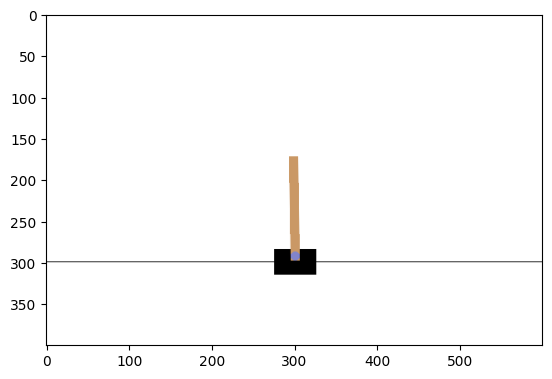

In [16]:
plt.imshow(frames[4].astype(np.float32) / 255.0)

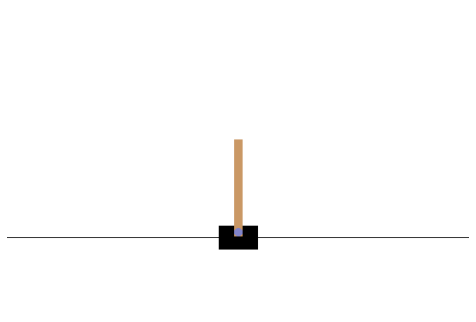

In [17]:

# 動画の保存と描画
anim = display_frames_as_gif(frames)
HTML(anim.to_html5_video())